In [ ]:
pip install bokeh

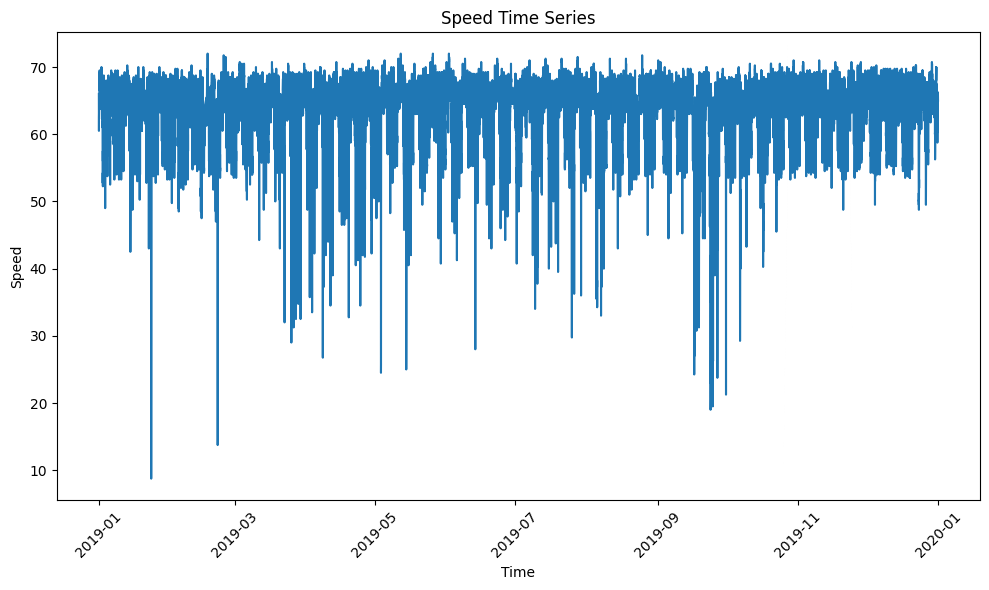

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('E:/xie/Sensor Files/3. filled w empty rows - fixed to 35040 rows/2019/10.2.268_emptyrows.csv')

# Convert 'DateTimeStamp' column to datetime type
df['DateTimeStamp'] = pd.to_datetime(df['DateTimeStamp'])

# Set 'DateTimeStamp' column as index
df.set_index('DateTimeStamp', inplace=True)

# Plot the time series graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=df['Speed'])
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed Time Series')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


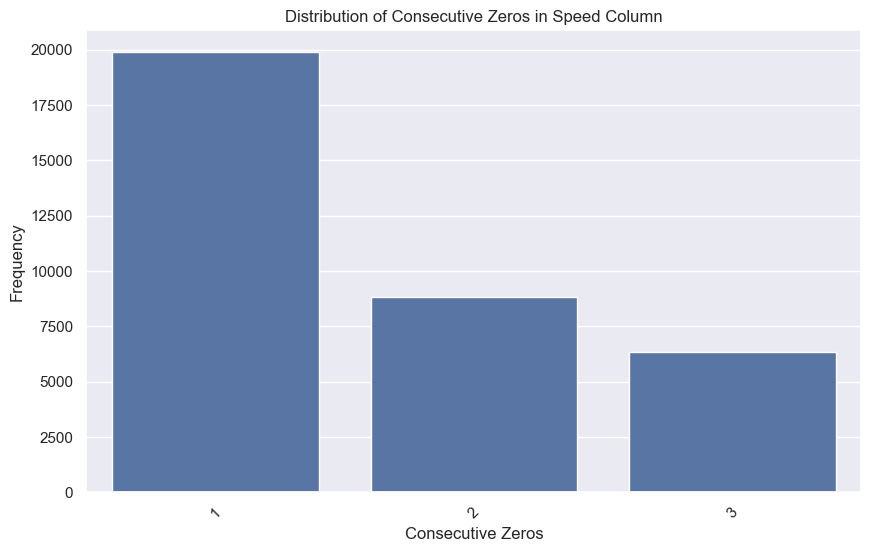

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('E:/xie/Sensor Files/4. impute/full 0 imputed/2018/2.1.268_filled.csv')

# Count consecutive zeros in the 'Speed' column
consecutive_zeros = df['Speed'].apply(lambda x: len(str(x).split('0')))

# Count the frequency of each count
count_frequency = consecutive_zeros.value_counts().sort_index().reset_index()
count_frequency.columns = ['Consecutive Zeros', 'Frequency']

# Plot the distribution using Seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Consecutive Zeros', y='Frequency', data=count_frequency)
plt.title('Distribution of Consecutive Zeros in Speed Column')
plt.xlabel('Consecutive Zeros')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


C:\Users\Tarek Zahid\AppData\Local\Temp\ipykernel_9932\1457996893.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


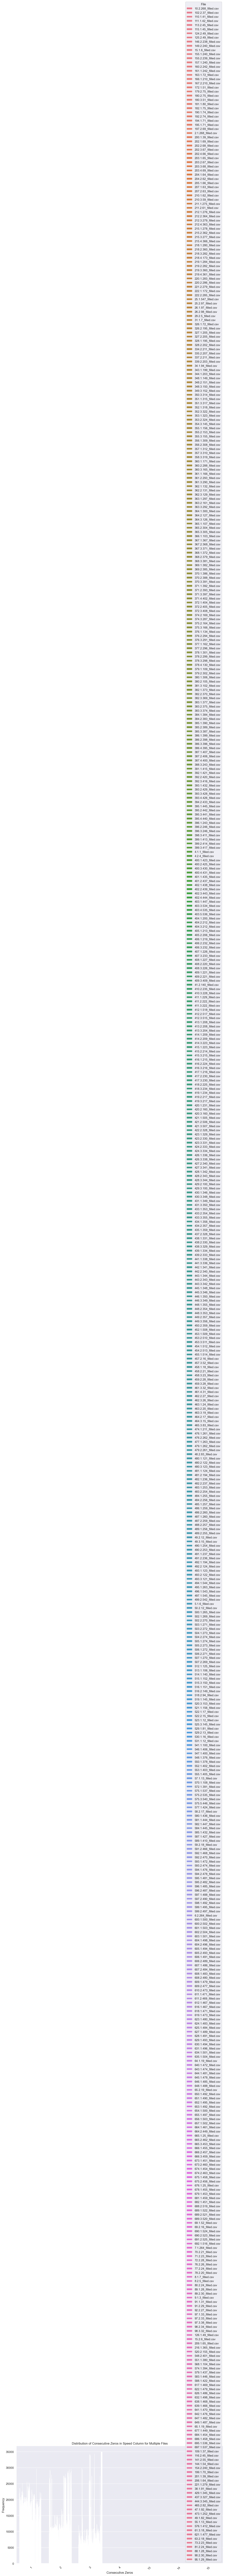

In [8]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Directory containing CSV files
directory = 'E:/xie/Sensor Files/4. impute/full 0 imputed/2018/'

# List to store dataframes
dfs = []

# Loop through CSV files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        # Read CSV file into a Pandas DataFrame
        df = pd.read_csv(file_path)
        # Count consecutive zeros in the 'Speed' column
        consecutive_zeros = df['Speed'].apply(lambda x: len(str(x).split('0')))
        # Count the frequency of each count
        count_frequency = consecutive_zeros.value_counts().sort_index().reset_index()
        count_frequency.columns = ['Consecutive Zeros', 'Frequency']
        # Add filename as a column for reference
        count_frequency['File'] = filename
        # Append to the list
        dfs.append(count_frequency)

# Concatenate all dataframes
df_combined = pd.concat(dfs)

# Plot the distributions side by side using Seaborn's barplot
plt.figure(figsize=(14, 8))
sns.barplot(x='Consecutive Zeros', y='Frequency', hue='File', data=df_combined)
plt.title('Distribution of Consecutive Zeros in Speed Column for Multiple Files')
plt.xlabel('Consecutive Zeros')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='File')
plt.tight_layout()
plt.show()
